In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.optimizers import SGD
import scipy.stats as stats
import tensorflow_probability as tfp
tfd = tfp.distributions

# Input data

In [9]:
data = np.load('x_train.npy')
data = np.squeeze(data)

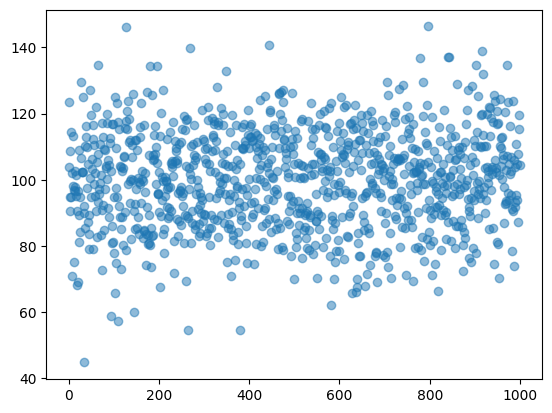

In [10]:
plt.plot(data, 'o', alpha=0.5)

# Maximum likelihood assuming Gaussian distribution

In [43]:
def nll(data):
    return -tf.reduce_sum(normal.log_prob(data))

In [45]:
@tf.function
def get_loss_and_grads(x_train):
    with tf.GradientTape() as tape:
        tape.watch(normal.trainable_variables)
        loss = nll(x_train)
        grads = tape.gradient(loss, normal.trainable_variables)
    return loss, grads

optimizer = SGD(learning_rate=0.001)
normal = tfd.Normal(loc=tf.Variable(1., name='mu'), scale=1)
normal.trainable_variables
for i in range(1000):
    _, grads = get_loss_and_grads(data)
    optimizer.apply_gradients(zip(grads, normal.trainable_variables))
mean = normal.trainable_variables[0].numpy()
mean

100.07782

In [50]:
@tf.function
def get_loss_and_grads(x_train):
    with tf.GradientTape() as tape:
        tape.watch(normal.trainable_variables)
        loss = nll(x_train)
        grads = tape.gradient(loss, normal.trainable_variables)
    return loss, grads

optimizer = SGD(learning_rate=0.001)
normal = tfd.Normal(loc=mean, scale=tf.Variable(1., name='sigma'))
normal.trainable_variables
for i in range(2000):
    _, grads = get_loss_and_grads(data)
    optimizer.apply_gradients(zip(grads, normal.trainable_variables))
sigma = normal.trainable_variables[0].numpy()
sigma

207.71269

## Plotting results

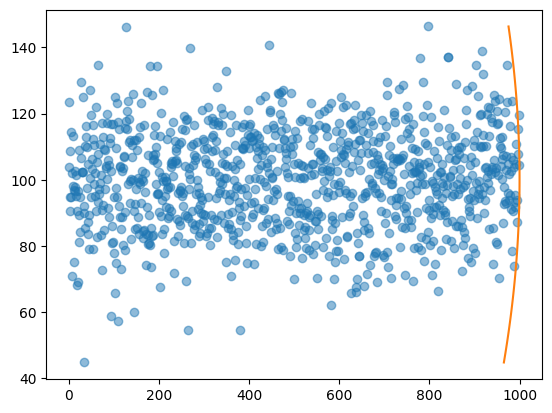

In [51]:
plt.plot(data, 'o', alpha=0.5)
ls = np.linspace(np.min(data), np.max(data), 100)
gaussian = stats.norm.pdf(ls, mean,  sigma)
plt.plot(gaussian*(data.shape[0]/np.max(gaussian)), ls)
plt.show()